In [359]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [360]:
filename = 'loan_data.csv'
train = pd.read_csv(filename)

In [361]:
test = pd.read_csv('test_data.csv')

In [362]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [363]:
train_test = [train, test]

In [364]:
### lets make a list of object data type columns and find unique values in them
obj_data = []
for index in train.dtypes.index:
    if train.dtypes.loc[index] == 'object':
        obj_data.append(index)

In [365]:
obj_data

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [366]:
for data in train_test:
    print("\n****************************************************\n")
    for feature in obj_data[1:-1]:
        print("Unique values in", feature)
        print(data[feature].value_counts())
        print("\n-----------------------------------------\n")


****************************************************

Unique values in Gender
Male      489
Female    112
Name: Gender, dtype: int64

-----------------------------------------

Unique values in Married
Yes    398
No     213
Name: Married, dtype: int64

-----------------------------------------

Unique values in Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

-----------------------------------------

Unique values in Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

-----------------------------------------

Unique values in Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

-----------------------------------------

Unique values in Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

-----------------------------------------


****************************************************

Unique values in Gender
Male      286
Female     70
Name: Gender, dtype: 

In [367]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [368]:
train.shape

(614, 13)

In [369]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [370]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130D3335898>,
      dtype=object)

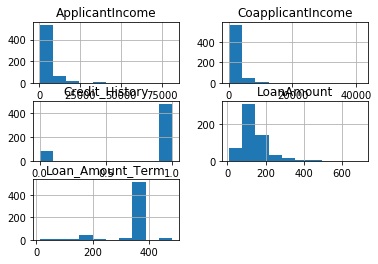

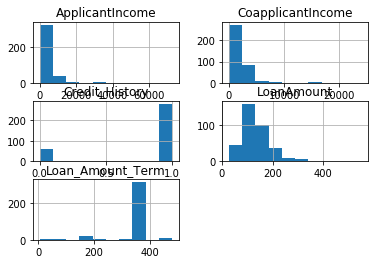

In [371]:
### Lets make some visualizations
train.hist()
test.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130D46233C8>,
      dtype=object)

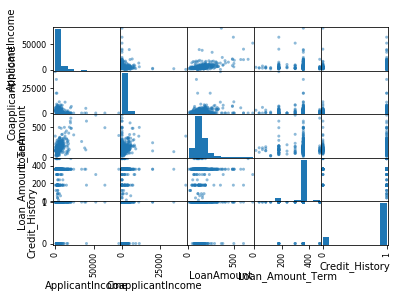

In [372]:
from pandas.plotting import scatter_matrix
scatter_matrix(train)

**There doesn't seem to be any multicollinearity issue**

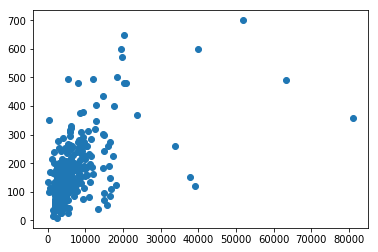

In [373]:
### applicant income and loan amount show some correlation
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])

In [374]:
# Visualise correlation using corr method , but this works fro numerical data
correlation = train.corr(method = 'pearson')
print(correlation)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


**Correlation between applicantincome and loan amount is ~0.6, we will not consider this as an severe issue of multicollinearity**

## Filling up Null values

In [375]:
for data in train_test:
    print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [376]:
for data in train_test:
    data['Gender'].fillna('Male', inplace = True)

In [377]:
train.groupby('Gender')['Married'].value_counts()

Gender  Married
Female  No          80
        Yes         31
Male    Yes        367
        No         133
Name: Married, dtype: int64

In [378]:
##Most females are unmarried and males are married
for df in train_test:
    df.loc[df['Gender'] == 'Male', 'Married'] = df.loc[df['Gender'] == 'Male']['Married'].fillna('Yes')
    df.loc[df['Gender'] == 'Female', 'Married'] = df.loc[df['Gender'] == 'Female']['Married'].fillna('No')

In [379]:
train.groupby('Dependents')['ApplicantIncome'].median()

Dependents
0     3598.0
1     4051.5
2     4006.0
3+    4691.0
Name: ApplicantIncome, dtype: float64

In [380]:
### If income less than 4000, fill dependents as 0, otherwise 2
for df in train_test:
    filt = (df['ApplicantIncome'] < 4000)
    df.loc[filt, 'Dependents'] = df.loc[filt]['Dependents'].fillna('0')
    df['Dependents'].fillna('3+', inplace = True)

In [381]:
for df in train_test:
    df['Self_Employed'].fillna('No', inplace = True)

C:\Users\Abhay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Abhay\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

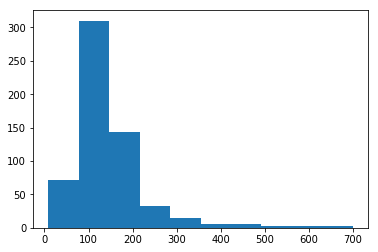

In [382]:
plt.hist(train['LoanAmount'])

In [383]:
###There is a correlation between loanamount and applicant income
### But first lets just replace it with the median value, not mean because the distribution has outliers
for df in train_test:
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [384]:
test['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [385]:
for df in train_test:
    df['Loan_Amount_Term'].fillna(360.0, inplace = True)

In [386]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [387]:
for df in train_test:
    df['Credit_History'].fillna(1 , inplace = True)

In [388]:
for df in train_test:
    print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Encoding categorical data

In [389]:
for feature in obj_data[1:]:
    print("Unique values in", feature)
    print(train[feature].value_counts())
    print("\n-----------------------------------------\n")

Unique values in Gender
Male      502
Female    112
Name: Gender, dtype: int64

-----------------------------------------

Unique values in Married
Yes    400
No     214
Name: Married, dtype: int64

-----------------------------------------

Unique values in Dependents
0     352
1     102
2     101
3+     59
Name: Dependents, dtype: int64

-----------------------------------------

Unique values in Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

-----------------------------------------

Unique values in Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64

-----------------------------------------

Unique values in Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

-----------------------------------------

Unique values in Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

-----------------------------------------



In [390]:
### First we will write down all the mapping dictionary, as there aren't much categories we won't use on-hot encoding
map_gender = {'Male':0, 'Female':1}
map_yes_no = {'Yes': 1, 'No':0}
### Could have used binarize method in sklearn instead of above two
map_dependents = {'0': 0, '1':0.25, '2' : 0.5, '3+' : 1.5}  #used this because later we will normalize numerical data
map_education = {'Graduate':1, 'Not Graduate' :0}
map_property = {'Semiurban':0.33, 'Urban' : 0.66, 'Rural' : 1.0}

In [391]:
for data in train_test:
    data['Gender'] = data['Gender'].map(map_gender)
    data['Dependents'] = data['Dependents'].map(map_dependents)
    data['Education'] = data['Education'].map(map_education)
    data['Property_Area'] = data['Property_Area'].map(map_property)
    data['Self_Employed'] = data['Self_Employed'].map(map_yes_no)
    data['Married'] = data['Married'].map(map_yes_no)

## Performing min-max normalization

In [392]:
### But before that the loanAmount is given in thousands, so lets make it similar to applicants income type
for data in train_test:
    data['LoanAmount'] = data['LoanAmount']*1000

In [393]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.00,1,0,5849,0.0,128000.0,360.0,1.0,0.66,Y
1,LP001003,0,1,0.25,1,0,4583,1508.0,128000.0,360.0,1.0,1.00,N
2,LP001005,0,1,0.00,1,1,3000,0.0,66000.0,360.0,1.0,0.66,Y
3,LP001006,0,1,0.00,0,0,2583,2358.0,120000.0,360.0,1.0,0.66,Y
4,LP001008,0,0,0.00,1,0,6000,0.0,141000.0,360.0,1.0,0.66,Y


In [394]:
### loan_status in train data is to be encoded to 0 or 1
train['Loan_Status'] = train['Loan_Status'].map({'N' : 0, 'Y' : 1})

In [395]:
### Drop loan_id column from both test and train
test_with_id = train_test[1].copy()
train_df = train_test[0].drop(['Loan_ID'], axis = 1)
test_df = train_test[1].drop(['Loan_ID'], axis = 1)

In [396]:
ftr = train_df.drop(['Loan_Status'], axis = 1)
trgt = train_df['Loan_Status']

In [397]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [398]:
### Lets use different classifiers and see their scores
from sklearn.model_selection import cross_val_score

In [399]:
from sklearn.linear_model import LogisticRegression
reg_without_norm = LogisticRegression()
score =  cross_val_score(reg_without_norm, ftr , trgt, cv = k_fold, scoring = 'accuracy')

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [400]:
score.mean()

0.6840296139608673

**Requires Normalization**

In [401]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.00,1,0,5720,0,110000.0,360.0,1.0,0.66
1,0,1,0.25,1,0,3076,1500,126000.0,360.0,1.0,0.66
2,0,1,0.50,1,0,5000,1800,208000.0,360.0,1.0,0.66
3,0,1,0.50,1,0,2340,2546,100000.0,360.0,1.0,0.66
4,0,0,0.00,0,0,3276,0,78000.0,360.0,1.0,0.66


In [402]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [403]:
train_data = scaling.fit_transform(train_df) 
test_data = scaling.fit_transform(test_df)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [404]:
train_final = pd.DataFrame(train_data, columns = train_df.columns)
test_final = pd.DataFrame(test_data, columns = test_df.columns)

In [405]:
test_final.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.000000,1.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,0.492537
1,0.0,1.0,0.166667,1.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,0.492537
2,0.0,1.0,0.333333,1.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,0.492537
3,0.0,1.0,0.333333,1.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,0.492537
4,0.0,0.0,0.000000,0.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,0.492537


## Training the model using train_final and predict for the test_final data

In [406]:
###Importing sklearn classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [407]:
features = train_final.drop('Loan_Status',axis = 1)
target = train_final['Loan_Status']

In [408]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,0.492537
1,0.0,1.0,0.166667,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,1.000000
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.492537
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.492537
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.492537


In [409]:
from sklearn.model_selection import GridSearchCV
###Lets create a dictionary of parameters for KNN
k_range = range(1,31)
param = dict(n_neighbors = k_range, weights = ['uniform', 'distance'])

In [410]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param, cv = 10, n_jobs = -1, scoring = 'accuracy')

In [411]:
grid.fit(features, target)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [412]:
print("Results of KNN :\n")
print(grid.best_score_)
print(grid.best_params_)

Results of KNN :

0.8094462540716613
{'n_neighbors': 14, 'weights': 'uniform'}


In [413]:
###Considering default parameters
tree_clf = DecisionTreeClassifier()

In [414]:
score = cross_val_score(tree_clf, features, target, cv = k_fold, scoring = 'accuracy')

In [415]:
score.mean()

0.7083553675304073

In [416]:
reg = LogisticRegression()
score =  cross_val_score(reg, features, target, cv = k_fold, scoring = 'accuracy')

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [417]:
score.mean()

0.8093336858804865

**Consider Hyperparameter tuning LogisticRegression**

In [418]:
###Using Naive_baise
gauss = GaussianNB()
score = cross_val_score(gauss, features, target, cv = k_fold, scoring = 'accuracy')

In [419]:
score.mean()

0.7947646747752511

In [420]:
### USing random forest regressor
forest_clf = RandomForestClassifier(n_estimators = 13)
score = cross_val_score(forest_clf, features, target, cv = k_fold, scoring = 'accuracy')

In [421]:
score.mean()

0.7801427815970386

In [422]:
svm_clf = SVC()
score = cross_val_score(svm_clf, features, target, cv = k_fold, scoring = 'accuracy')

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [423]:
score.mean()

0.8093336858804865

In [424]:
### RidgeClassifier
from sklearn.linear_model import RidgeClassifier

In [425]:
ridge_clf = RidgeClassifier()
score = cross_val_score(ridge_clf, features, target, cv = k_fold, scoring = 'accuracy')

In [426]:
score.mean()

0.8093336858804865

### Hyperparameter tuning 

In [427]:
### Tuning logistic regression hyperparameter 
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [428]:
param_reg = dict(solver = solvers, penalty = penalty, C = c_values)

In [429]:
grid_reg = GridSearchCV(reg, param_reg, cv = 10, n_jobs = -1, scoring = 'accuracy')

In [430]:
grid_reg.fit(features, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [431]:
print("Logistic Regression scores and parameters:  \n")
print(grid_reg.best_score_)
print(grid_reg.best_params_)

Logistic Regression scores and parameters:  

0.8094462540716613
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


**Not much improvement from the default parameters values**

In [432]:
### Parameter tuning for Ridgeclassifier
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ridge_params = dict(alpha = alpha)

In [433]:
grid_ridge = GridSearchCV(ridge_clf, ridge_params, cv = 5, n_jobs = -1, scoring = 'accuracy')

In [434]:
grid_ridge.fit(features, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [435]:
print("Ridge Classifier scores and parameters:  \n")
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

Ridge Classifier scores and parameters:  

0.8094462540716613
{'alpha': 0.1}


In [436]:
###Parameter tuning the svm classifier
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
svm_params = dict(kernel = kernel, C =C, gamma = gamma)
svm_grid = GridSearchCV(svm_clf, svm_params, cv = 10, scoring = 'accuracy')

In [437]:
svm_grid.fit(features, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [438]:
print("SVM classifier scores and parameters:  \n")
print(svm_grid.best_score_)
print(svm_grid.best_params_)

SVM classifier scores and parameters:  

0.8094462540716613
{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}


In [439]:
### Finalising Losgistic regression as the final model
loan_status_pred = grid_reg.predict(test_final)

In [440]:
loan_status_pred

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [441]:
submission = pd.read_csv('submission.csv')

In [442]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [443]:
submission = submission.drop(['Loan_Status'], axis = 1)

In [444]:
submission['Loan_Status'] = loan_status_pred

In [445]:
submission.head(20)

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0
5,LP001054,1.0
6,LP001055,1.0
7,LP001056,0.0
8,LP001059,1.0
9,LP001067,1.0


In [446]:
output_map = {1.0 : 'Y', 0.0 : 'N'}
submission['Loan_Status'] = submission['Loan_Status'].map(output_map)

In [447]:
submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [448]:
### Storing it in a csv file
submission.to_csv('loan_pred_submission.csv', index = False)

In [449]:
### Using RidgeClassifier
ridge_pred = grid_ridge.predict(test_final)

In [450]:
submission = submission.drop(['Loan_Status'], axis = 1)
submission['Loan_Status'] = ridge_pred
submission['Loan_Status'] = submission['Loan_Status'].map(output_map)

In [451]:
### Storing it in a csv file
submission.to_csv('submission_ridge.csv', index = False)

## Checking by dropping some of the features

In [452]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,0.492537
1,0.0,1.0,0.166667,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,1.000000
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.492537
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.492537
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.492537


In [453]:
### Dropping the coapplicantIncome feature
feature_1 = features.drop(['CoapplicantIncome'], axis = 1)
test_1 = test_final.drop(['CoapplicantIncome'], axis = 1)

In [454]:
grid_reg_1 = GridSearchCV(reg, param_reg, cv = 10, n_jobs = -1, scoring = 'accuracy')

In [455]:
grid_reg_1.fit(feature_1, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [456]:
print("Logistic Regression scores and parameters:  \n")
print(grid_reg_1.best_score_)
print(grid_reg_1.best_params_)

Logistic Regression scores and parameters:  

0.8094462540716613
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [457]:
grid_ridge.fit(feature_1, target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [458]:
print("Ridge Classifier scores and parameters:  \n")
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

Ridge Classifier scores and parameters:  

0.8094462540716613
{'alpha': 0.2}


In [459]:
features.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [460]:
# ExtraTreeRegressor uses ensemble technique, (related to random forest regressor)
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(features, target)

C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [461]:
print(model.feature_importances_)

[0.02065149 0.02375336 0.06443589 0.02281631 0.02373683 0.17125213
 0.11962916 0.17597928 0.05342511 0.29220087 0.03211958]


In [462]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,0.492537
1,0.0,1.0,0.166667,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,1.000000
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.492537
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.492537
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.492537


In [463]:
for col in features.columns:
    feat_1 = features.drop([col], axis = 1)
    grid_reg.fit(feat_1, target)
    print("Dropped",col,"feature.", end = " ")
    print("Best score : ", grid_reg.best_score_)

Dropped Gender feature. Best score :  0.8094462540716613
Dropped Married feature. Best score :  0.8094462540716613
Dropped Dependents feature. Best score :  0.8094462540716613
Dropped Education feature. Best score :  0.8094462540716613
Dropped Self_Employed feature. Best score :  0.8094462540716613
Dropped ApplicantIncome feature. Best score :  0.8094462540716613
Dropped CoapplicantIncome feature. Best score :  0.8094462540716613
Dropped LoanAmount feature. Best score :  0.8094462540716613
Dropped Loan_Amount_Term feature. Best score :  0.8094462540716613
Dropped Credit_History feature. Best score :  0.6872964169381107
Dropped Property_Area feature. Best score :  0.8094462540716613


In [464]:
###  Using recursive feature elemination(RFE) to extract important features
from sklearn.feature_selection import RFE

In [465]:
log_reg = LogisticRegression()
rfe = RFE(log_reg, 3)
fit = rfe.fit(features, target)
print(fit.ranking_)

[8 4 9 5 7 6 1 3 2 1 1]


C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [466]:
features_2 = features.iloc[:,[6,9,10]]

In [467]:
score = cross_val_score(log_reg, features_2, target, cv = k_fold, scoring = 'accuracy')
print(score.mean())

0.8093336858804865


C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [468]:
grid_reg.fit(features_2, target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [469]:
grid_reg.best_score_

0.8094462540716613